1. Hypothesis on the Number of Bathrooms and Poverty Level
Null Hypothesis (H0): There is no significant correlation between the number of public bathrooms in a borough and its poverty level.
Alternative Hypothesis (H1): There is a significant correlation between the number of public bathrooms in a borough and its poverty level.

2. Hypothesis on the Number of Bathrooms and Population Size
Null Hypothesis (H0): The number of public bathrooms in a borough is not significantly correlated with its population size.
Alternative Hypothesis (H1): The number of public bathrooms in a borough is significantly correlated with its population size.

3. Hypothesis on the Number of Bathrooms and Median Income
Null Hypothesis (H0): There is no significant correlation between the number of public bathrooms in a borough and the median income of its residents.
Alternative Hypothesis (H1): There is a significant correlation between the number of public bathrooms in a borough and the median income of its residents.

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R
#How many bathrooms are there in each borough?
library(readxl)
library(dplyr)

data <- read_excel("merged.xlsx") 

bathrooms_by_borough <- data %>%
  group_by(Borough) %>%
  summarise(NumberOfBathrooms = n()) %>%
  arrange(desc(NumberOfBathrooms))

print(bathrooms_by_borough)


# A tibble: 5 × 2
  Borough       NumberOfBathrooms
  <chr>                     <int>
1 Brooklyn                    507
2 Queens                      483
3 Manhattan                   387
4 Bronx                       351
5 Staten Island               114



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
%%R
library(dplyr)

bathroom_counts <- data %>%
  group_by(Borough) %>%
  summarize(number_of_bathrooms = n())


In [7]:
%%R 

#Getting the data of all NY to compare it with my data

library(tidycensus)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 26 rows containing missing values (`geom_point()`). 

R[write to console]: 2: Removed 26 rows containing missing values (`geom_point()`). 



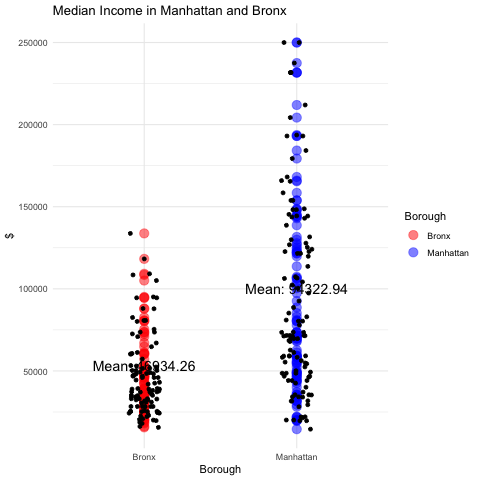

In [141]:
%%R

library(ggplot2)
library(dplyr)


filtered_data <- data %>%
  filter(Borough %in% c("Manhattan", "Bronx"), variable == "med_inc")

mean_incomes <- filtered_data %>%
  group_by(Borough) %>%
  summarize(mean_income = mean(estimate, na.rm = TRUE))

ggplot(filtered_data, aes(x=Borough, y=estimate)) + 
  geom_point(aes(color=Borough), size=4, alpha=0.5) + 
  geom_jitter(width=0.1) +  
  geom_text(data = mean_incomes, aes(x = Borough, y = mean_income, label = paste("Mean:", round(mean_income, 2))), 
            vjust = -0.5, color = "black", size = 5) + 
  labs(x="Borough", y="$", title="Median Income in Manhattan and Bronx") +
  theme_minimal() +
  scale_color_manual(values=c("Manhattan"="blue", "Bronx"="red"))  


In [30]:
%%R
#Population in each borough

data <- read_excel("merged.xlsx") 

population_data <- data %>%
  filter(variable == "population") %>%
  group_by(Borough) %>%
  summarize(TotalPopulation = sum(estimate, na.rm = TRUE)) %>%
  arrange(desc(TotalPopulation))

print(population_data)


# A tibble: 5 × 2
  Borough       TotalPopulation
  <chr>                   <dbl>
1 Manhattan              714183
2 Queens                 611809
3 Brooklyn               587439
4 Bronx                  481032
5 Staten Island          173391


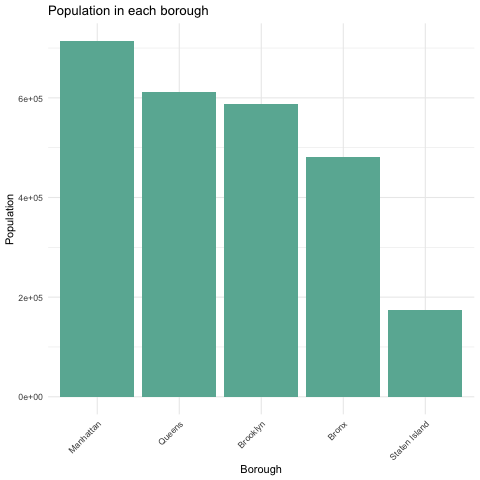

In [35]:
%%R

library(ggplot2)


ggplot(population_data, aes(x=reorder(Borough, -TotalPopulation), y=TotalPopulation)) +
    geom_bar(stat="identity", fill="#69b3a2") +  # Changed fill color to a shade of green
    labs(x="Borough", y="Population", title="Population in each borough") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability



In [161]:
%%R
library(readxl)
library(dplyr)
library(ggplot2)

In [162]:
%%R
observation_counts <- data %>%
  group_by(Borough) %>%
  summarize(ObservationCount = n()) 

combined_data <- merge(population_data, observation_counts, by = "Borough")


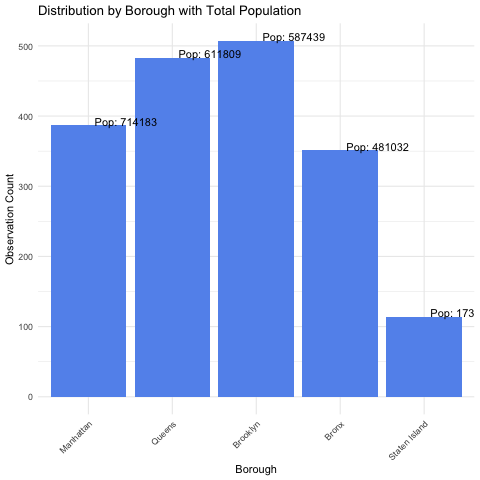

In [163]:
%%R
ggplot(combined_data, aes(x = reorder(Borough, -TotalPopulation), y = ObservationCount)) +
  geom_bar(stat = "identity", fill = "cornflowerblue") +
  geom_text(aes(label = paste("Pop:", TotalPopulation)), 
            position = position_dodge(width = 0.9), hjust = -0.1, vjust = 0) +
  theme_minimal() +
  labs(title = "Distribution by Borough with Total Population",
       x = "Borough",
       y = "Observation Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [138]:
%%R

library(ggplot2)
library(dplyr)

borough1 <- "Bronx"
borough2 <- "Manhattan"


filtered_data <- data %>%
  filter(Borough %in% c(borough1, borough2), variable == "med_inc")

t_test_result <- t.test(estimate ~ Borough, data = filtered_data)

print(t_test_result)



	Welch Two Sample t-test

data:  estimate by Borough
t = -7.8385, df = 154.89, p-value = 6.85e-13
alternative hypothesis: true difference in means between group Bronx and group Manhattan is not equal to 0
95 percent confidence interval:
 -59331.17 -35446.19


sample estimates:
    mean in group Bronx mean in group Manhattan 
               46934.26                94322.94 



In [146]:
%%R

library(dplyr)

filtered_data <- data %>%
  filter(variable == "med_inc")

borough_median_income <- filtered_data %>%
  group_by(Borough) %>%
  summarize(borough_median = median(estimate, na.rm = TRUE))


enhanced_data <- filtered_data %>%
  left_join(borough_median_income, by = "Borough") %>%
  mutate(
    distance_from_borough_median = abs(estimate - borough_median),
    ratio_to_borough_median = estimate / borough_median,
    log_ratio_to_borough_median = log(ratio_to_borough_median)
  )
 

In [129]:
%%R

library(dplyr)

data_filtered <- data %>%
  filter(Borough %in% c(borough1, borough2), variable == "med_inc")

borough_medians <- data_filtered %>%
  group_by(Borough) %>%
  summarize(borough_median = median(estimate, na.rm = TRUE))

enhanced_data <- data_filtered %>%
  left_join(borough_medians, by = "Borough") %>%
  mutate(log_ratio_to_borough_median = log(estimate / borough_median))

enhanced_data$Borough <- factor(enhanced_data$Borough, levels = c(borough1, borough2))

t_test_result <- t.test(log_ratio_to_borough_median ~ Borough, data = enhanced_data)

print(t_test_result)





	Welch Two Sample t-test

data:  log_ratio_to_borough_median by Borough
t = -0.37371, df = 41.831, p-value = 0.7105
alternative hypothesis: true difference in means between group Staten Island and group Queens is not equal to 0
95 percent confidence interval:
 -0.2295147  0.1577994
sample estimates:
mean in group Staten Island        mean in group Queens 
                -0.04748023                 -0.01162260 



The overall interpretation is that, according to this dataset and the Welch Two Sample t-test, there is no statistically significant difference in the economic standing of census tracts with public bathrooms relative to their boroughs' median median incomes between Manhattan and the Bronx. 

In [130]:
%%R
#Median income in each borough

library(readxl)
library(dplyr)

data <- read_excel("merged.xlsx") 

med_inc_data <- data %>%
  filter(variable == "med_inc") %>%
  group_by(Borough) %>%
  summarize(MedianIncome = mean(estimate, na.rm = TRUE)) %>%
  arrange(desc(MedianIncome))


print(med_inc_data)


# A tibble: 5 × 2
  Borough       MedianIncome
  <chr>                <dbl>
1 Staten Island       94391.
2 Manhattan           94323.
3 Queens              78128.
4 Brooklyn            77910.
5 Bronx               46934.


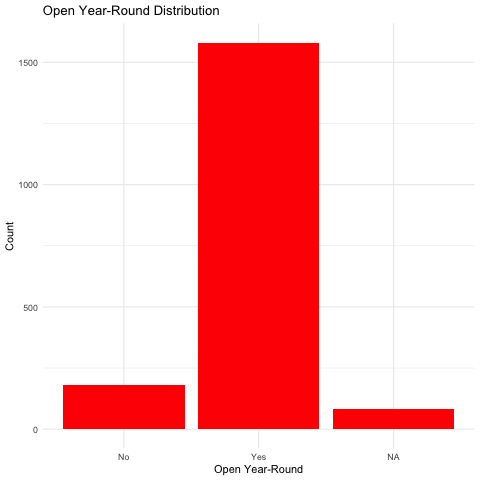

In [156]:
%%R


# Bar plot for Open Year-Round, make every bar with a different color




ggplot(data, aes(x = `Open Year-Round`)) +
  geom_bar(fill = "red") +
  theme_minimal() +
  labs(title = "Open Year-Round Distribution", x = "Open Year-Round", y = "Count")




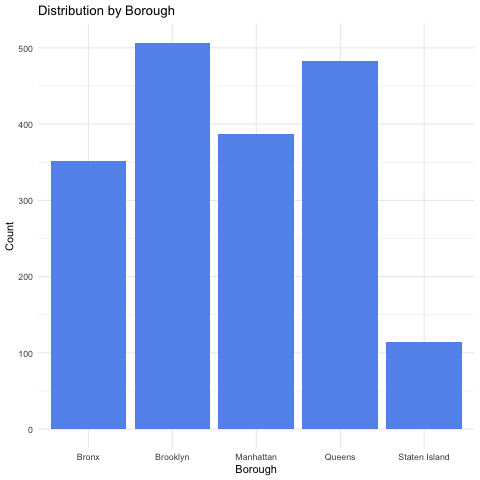

In [154]:
%%R
ggplot(data, aes(x = Borough)) +
  geom_bar(fill = "cornflowerblue") +
  theme_minimal() +
  labs(title = "Distribution by Borough", x = "Borough", y = "Count")

Null Hypothesis (H0): There isn't a correlation between the number of public bathrooms in a borough and its poverty level.

Alternative Hypothesis (H1): There is an important correlation between the number of public bathrooms in a borough and its poverty level.